In [1]:
import os
import Augmentor

# Define the base directory where the subfolders are located
base_directory = r"E:\Research\\components"

# Loop through all 15 folders
for i in range(1, 5):
    # Define the path for the current folder using os.path.join
    folder_name = str(i)
    folder_path = os.path.join(base_directory, folder_name)
    
    # Check if the folder exists
    if os.path.exists(folder_path):
        # Create an Augmentor pipeline for image augmentation
        p = Augmentor.Pipeline(folder_path)
        
        # Add augmentation operations as needed
        p.zoom(probability=0.6, min_factor=0.75, max_factor=1)
        p.flip_top_bottom(probability=0.5)
        p.flip_left_right(probability=0.5)
        p.rotate(probability=1, max_left_rotation=25, max_right_rotation=25)
        p.rotate_random_90(probability=1)
        p.random_brightness(probability=0.5, min_factor=0.4, max_factor=0.9)
        p.random_distortion(probability=0.5, grid_width=7, grid_height=8, magnitude=9)
        p.random_erasing(probability=0.3, rectangle_area=0.2)
        
        # Sample the augmented images (generate 150 augmented images for each folder)
        p.sample(150)
    else:
        print(f"Folder {folder_name} does not exist at {folder_path}")

Initialised with 162 image(s) found.
Output directory set to E:\Research\\components\1\output.

Processing <PIL.Image.Image image mode=RGBA size=148x203 at 0x1F4719C5ED0>: 100%|██████████| 150/150 [00:03<00:00, 49.25 Samples/s]


Initialised with 166 image(s) found.
Output directory set to E:\Research\\components\2\output.

Processing <PIL.Image.Image image mode=RGBA size=193x166 at 0x1F4719777C0>: 100%|██████████| 150/150 [00:02<00:00, 74.36 Samples/s] 


Initialised with 162 image(s) found.
Output directory set to E:\Research\\components\3\output.

Processing <PIL.Image.Image image mode=RGBA size=166x245 at 0x1F4719C4A30>: 100%|██████████| 150/150 [00:02<00:00, 69.28 Samples/s] 


Initialised with 116 image(s) found.
Output directory set to E:\Research\\components\4\output.

Processing <PIL.Image.Image image mode=RGBA size=183x192 at 0x1F471977B20>:  36%|███▌      | 54/150 [00:00<00:01, 88.05 Samples/s] 


ValueError: Coordinate 'lower' is less than 'upper'

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define the root directory containing subfolders for each image class
data_dir = 'E:\Research\data'
batch_size = 32
image_size = (224, 224)  # Adjust the size as needed

# Use the ImageDataGenerator to load and preprocess images
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2,  # Split the data into training and validation sets
)

# Create a training dataset
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training',  # Specify 'training' to create the training dataset
    shuffle=True,  # Shuffle the data
)

# Create a validation dataset
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='validation',  # Specify 'validation' to create the validation dataset
    shuffle=False,  # Do not shuffle the validation data
)

# Optionally, you can create a test dataset in a similar way
# test_data = datagen.flow_from_directory(
#     'test_data_dir',
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='categorical',  # Use 'categorical' for multi-class classification
#     shuffle=False,  # Do not shuffle the test data
# )

# You can now use train_data and val_data for training and validation in your machine learning model.

Found 55308 images belonging to 3 classes.
Found 13827 images belonging to 3 classes.


In [6]:
import numpy as np
import cv2 as cv
from glob import glob
from tqdm import tqdm

# Initialize data and label lists
data_list = []
label_list = []

# Define the shape for resizing
image_shape = (32, 32)

# Function to convert an image to an array
def img_to_arr(add, shape):
    image = cv.imread(add)
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, shape)
    image = image.astype("float32") / 255
    return image

for i in range(1, 16):
    print('Extracting patches for Component ' + str(i))
    path = 'E:\\Research\\data\\train\\' + str(i) + '\\'
    type_1 = glob(path + '*.bmp')

    for image_path in tqdm(type_1):
        image = img_to_arr(image_path, image_shape)
        data_list.append(image)
        label_list.append(i)

data = np.stack(data_list, axis=0)  # Convert the list of images to a NumPy array
labels = np.array(label_list)

# Save the data and labels
np.save('E:\\Research\\test\\data_32.npy', data)
np.save('E:\\Research\\test\\labels.npy', labels)


Extracting patches for Component 1


100%|██████████| 5036/5036 [04:39<00:00, 18.03it/s]


Extracting patches for Component 2


100%|██████████| 5000/5000 [02:54<00:00, 28.61it/s]


Extracting patches for Component 3


100%|██████████| 5250/5250 [02:18<00:00, 37.99it/s] 


Extracting patches for Component 4


100%|██████████| 5244/5244 [02:39<00:00, 32.94it/s]


Extracting patches for Component 5


100%|██████████| 4250/4250 [01:22<00:00, 51.35it/s]


Extracting patches for Component 6


100%|██████████| 4000/4000 [01:10<00:00, 57.00it/s]


Extracting patches for Component 7


100%|██████████| 1250/1250 [00:16<00:00, 75.12it/s]


Extracting patches for Component 8


100%|██████████| 4250/4250 [01:35<00:00, 44.51it/s] 


Extracting patches for Component 9


100%|██████████| 5588/5588 [02:07<00:00, 43.87it/s]


Extracting patches for Component 10


100%|██████████| 5388/5388 [02:33<00:00, 35.06it/s]


Extracting patches for Component 11


100%|██████████| 6250/6250 [01:14<00:00, 83.71it/s] 


Extracting patches for Component 12


100%|██████████| 250/250 [00:04<00:00, 58.58it/s]


Extracting patches for Component 13


100%|██████████| 5713/5713 [01:13<00:00, 77.47it/s] 


Extracting patches for Component 14


100%|██████████| 4566/4566 [01:31<00:00, 49.83it/s]


Extracting patches for Component 15


100%|██████████| 3500/3500 [01:50<00:00, 31.72it/s]


In [ ]:
import numpy as np
import cv2 as cv
from glob import glob
from tqdm import tqdm

def img_to_arr(add, shape):
    image = cv.imread(add)
    #image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, shape)
    image = image.astype("float32") / 255
    return np.array(image)

for i in range(14, 15):
    data = []  # Create an empty list for the data
    label = []

    path = 'E:\\Research\\data\\train' + str(i) + '\\'
    print('Extracting patches for Component' + str(i))
    type_1 = glob(path + '*.bmp')

    for j in tqdm(range(len(type_1))):
        image = img_to_arr(type_1[j], [32, 32])
        data.append(image)  # Append the image to the list
        label.append(i)

    path2 = 'E:\\Research\\test' + str(i) + '\\'
    type_2 = glob(path2 + '*.bmp')

    for j in tqdm(range(len(type_2))):
        image = img_to_arr(type_2[j], [32, 32])
        data.append(image)  # Append the image to the list
        label.append(i)

    data = np.array(data)  # Convert the list to a NumPy array

    # Save the data and labels
    np.save('E:\\Research\\test\\data_32_' + str(i) + '.npy', data)
    np.save('E:\\Research\\test\\label_32_' + str(i) + '.npy', label)


In [ ]:
import numpy as np
import cv2 as cv
from glob import glob
from tqdm import tqdm

data = np.empty((32, 32))  
label = []

def img_to_arr(add, shape):
    image = cv.imread(add)
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, shape)
    image = image.astype("float32") / 255
    return np.array(image)

for i in range(1, 5):
    print('Extracting patches for Component' + str(i))
    path = 'E:\Research\components' + str(i) + '/'
    type_1 = glob(path + '*.bmp')

    for j in tqdm(range(len(type_1))):
        image = img_to_arr(type_1[j], [32, 32])
        data = np.dstack([data, image])
        label.append(i)

In [ ]:

def img_to_arr(add, shape):
  image = cv.imread(add)
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  image = cv.resize(image,shape)
  image=image.astype("float32") / 255
  #image = image/255.0
  #image = image.reshape((1,shape[0]*shape[1]))
  return (np.array(image))

for i in range(1,16):
  print('Extracting patches for '+str(i))
  path='E:\Research\\test'+ str(i)+'/'
  type_1 = glob(path+'*.bmp')
  for j in tqdm(range(len(type_1))):
    image=img_to_arr(type_1[j],[32,32])
    data=np.dstack([data,image])
    label.append(i)

In [7]:
import numpy as np

data_1 = None  # Initialize as None
label1 = []

for i in range(1, 16):
    print('Combining features for ' + str(i))
    
    if i == 14:
        data2 = np.load('E:\\Research\\test\\data_32_' + str(i) + '.npy')
        label2 = np.load('E:\\Research\\test\\label_32_' + str(i) + '.npy')
        
        if data_1 is None:
            data_1 = data2
        else:
            if data_1.shape[2] == data2.shape[2]:
                data_1 = np.dstack([data_1, data2])
            else:
                print(f"Dimensions don't match for Component {i}. Skipping.")
        
        for j in label2:
            label1.append(j)

# Ensure data_1 has 3 dimensions (height, width, num_samples)
if data_1 is not None and data_1.ndim == 2:
    data_1 = data_1[:, :, np.newaxis]

# Save the combined data and labels
if data_1 is not None:
    np.save('E:\\Research\\test\\fulldata_32.npy', data_1)
if label1:
    np.save('E:\\Research\\test\\fulllabels_32.npy', label1)


Combining features for 1
Combining features for 2
Combining features for 3
Combining features for 4
Combining features for 5
Combining features for 6
Combining features for 7
Combining features for 8
Combining features for 9
Combining features for 10
Combining features for 11
Combining features for 12
Combining features for 13
Combining features for 14
Combining features for 15


In [13]:
import numpy as np
import cv2 as cv
from glob import glob
from tqdm import tqdm

# Initialize data and label lists
data_list = []
label_list = []

# Define the shape for resizing
image_shape = (32, 32)

# Function to convert an image to an array
def img_to_arr(add, shape):
    image = cv.imread(add)
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, shape)
    image = image.astype("float32") / 255
    return image

for i in range(1, 16):
    print('Extracting patches for Component ' + str(i))
    path = 'E:\\Research\\data\\train\\' + str(i) + '\\'
    type_1 = glob(path + '*.bmp')

    for image_path in tqdm(type_1):
        image = img_to_arr(image_path, image_shape)
        data_list.append(image)
        label_list.append(i)

data = np.stack(data_list, axis=0)  # Convert the list of images to a NumPy array
labels = np.array(label_list)

# Print labels to check if they are correctly populated
print(labels)

# Save the data and labels
np.save('E:\\Research\\test\\data_32.npy', data)
np.save('E:\\Research\\test\\labels.npy', labels)

import numpy as np

data_1 = None  # Initialize as None
label1 = []

for i in range(1, 16):
    print('Combining features for ' + str(i))
    
    if i == 14:
        data2 = np.load('E:\\Research\\test\\data_32_' + str(i) + '.npy')
        label2 = np.load('E:\\Research\\test\\label_32_' + str(i) + '.npy')
        
        if data_1 is None:
            data_1 = data2
        else:
            if data_1.shape[2] == data2.shape[2]:
                data_1 = np.dstack([data_1, data2])
            else:
                print(f"Dimensions don't match for Component {i}. Skipping.")
        
        for j in label2:
            label1.append(j)

# Ensure data_1 has 3 dimensions (height, width, num_samples)
if data_1 is not None and data_1.ndim == 2:
    data_1 = data_1[:, :, np.newaxis]

# Print label1 to check if it's correctly populated
print(label1)

# Save the combined data and labels
if data_1 is not None:
    np.save('E:\\Research\\test\\fulldata_32.npy', data_1)
if label1:
    np.save('E:\\Research\\test\\fulllabels_32.npy', label1)


Extracting patches for Component 1


100%|██████████| 5036/5036 [02:17<00:00, 36.58it/s]


Extracting patches for Component 2


100%|██████████| 5000/5000 [01:38<00:00, 50.83it/s]


Extracting patches for Component 3


100%|██████████| 5250/5250 [01:47<00:00, 48.93it/s]


Extracting patches for Component 4


100%|██████████| 5244/5244 [01:42<00:00, 51.12it/s]


Extracting patches for Component 5


100%|██████████| 4250/4250 [01:19<00:00, 53.74it/s]


Extracting patches for Component 6


100%|██████████| 4000/4000 [01:19<00:00, 50.56it/s]


Extracting patches for Component 7


100%|██████████| 1250/1250 [00:17<00:00, 71.32it/s]


Extracting patches for Component 8


100%|██████████| 4250/4250 [00:56<00:00, 74.98it/s] 


Extracting patches for Component 9


100%|██████████| 5588/5588 [01:30<00:00, 61.60it/s]


Extracting patches for Component 10


100%|██████████| 5388/5388 [02:27<00:00, 36.58it/s]


Extracting patches for Component 11


100%|██████████| 6250/6250 [01:34<00:00, 66.22it/s] 


Extracting patches for Component 12


100%|██████████| 250/250 [00:03<00:00, 74.03it/s]


Extracting patches for Component 13


100%|██████████| 5713/5713 [01:16<00:00, 74.38it/s]


Extracting patches for Component 14


100%|██████████| 4566/4566 [01:48<00:00, 42.22it/s]


Extracting patches for Component 15


100%|██████████| 3500/3500 [02:09<00:00, 26.92it/s]


[ 1  1  1 ... 15 15 15]
Combining features for 1
Combining features for 2
Combining features for 3
Combining features for 4
Combining features for 5
Combining features for 6
Combining features for 7
Combining features for 8
Combining features for 9
Combining features for 10
Combining features for 11
Combining features for 12
Combining features for 13
Combining features for 14
Combining features for 15
[]


In [15]:
from sklearn.model_selection import train_test_split
import numpy as np

# Load data and labels
data_1 = np.load('E:\\Research\\test\\data_32.npy')
label = np.load('E:\\Research\\test\\labels.npy')

# Reshape the data (assuming the shape is (num_samples, height, width))
data_1 = data_1.reshape(data_1.shape[0], 32, 32, 1)

label = label - 1

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(data_1, label, test_size=0.4, random_state=10, stratify=label)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10, stratify=y_temp)


410/410 [==============================] - 20s 49ms/step


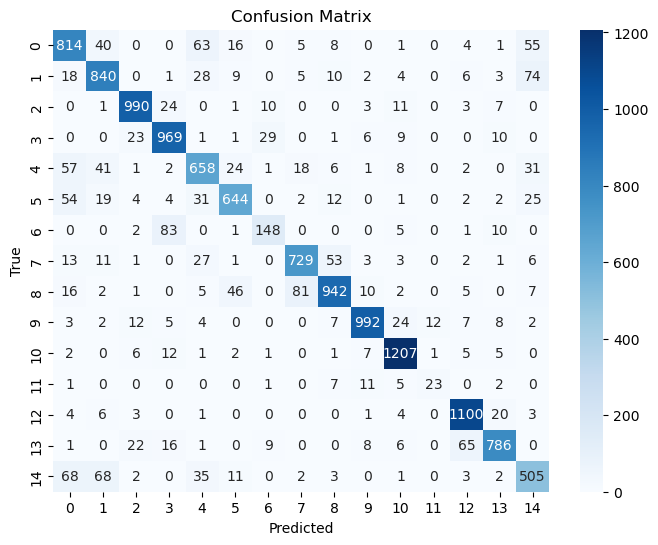

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have predictions in y_pred (replace with your actual predictions)
y_pred = model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have a threshold value to determine class membership
threshold = 0.5  # Adjust this threshold as needed

# Convert continuous predictions to class labels
y_pred_labels = (y_pred > threshold).astype(int)

# Calculate the confusion matrix with the discrete labels
confusion = confusion_matrix(y_true, y_pred_labels)

# Now you can print or visualize the confusion matrix
print("Confusion Matrix:")
print(confusion)

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [17]:
data_1 = np.load('E:\\Research\\test\\data_32.npy')
print(data_1.shape)

(65535, 32, 32)


In [18]:
# Create CNN model
import tensorflow as tf
import keras
from keras import datasets, layers, models
from keras import backend as K
from keras.layers import Dense, Dropout, Flatten

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(Dropout(0.50))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

#model.add(Dropout(0.50))
model.add(layers.Flatten())
model.add(layers.Dense(1024,  activation='relu'))
#model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(15, activation='softmax'))
# Compile model
#opt = keras.optimizers.Adam(learning_rate=0.0001)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [20]:
model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
#model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
#history = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_split=.2)
history = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_val,y_val))

Epoch 1/20
154/154 [==============================] - 221s 1s/step - loss: 2.2384 - accuracy: 0.2496 - val_loss: 1.6366 - val_accuracy: 0.4463
Epoch 2/20
154/154 [==============================] - 130s 843ms/step - loss: 1.5198 - accuracy: 0.4803 - val_loss: 1.1863 - val_accuracy: 0.5967
Epoch 3/20
154/154 [==============================] - 283s 2s/step - loss: 1.1799 - accuracy: 0.5867 - val_loss: 0.9989 - val_accuracy: 0.6512
Epoch 4/20
154/154 [==============================] - 192s 1s/step - loss: 1.0000 - accuracy: 0.6492 - val_loss: 0.8257 - val_accuracy: 0.7204
Epoch 5/20
154/154 [==============================] - 256s 2s/step - loss: 0.8684 - accuracy: 0.6913 - val_loss: 0.7495 - val_accuracy: 0.7394
Epoch 6/20
154/154 [==============================] - 179s 1s/step - loss: 0.7878 - accuracy: 0.7222 - val_loss: 0.6882 - val_accuracy: 0.7633
Epoch 7/20
154/154 [==============================] - 128s 828ms/step - loss: 0.7146 - accuracy: 0.7453 - val_loss: 0.6406 - val_accuracy: 

410/410 - 12s - loss: 0.4046 - accuracy: 0.8657 - 12s/epoch - 29ms/step


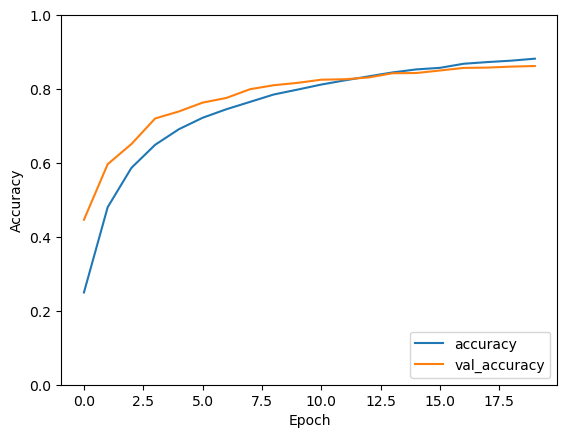

In [21]:
import matplotlib.pyplot as pl
pl.plot(history.history['accuracy'], label='accuracy')
pl.plot(history.history['val_accuracy'], label = 'val_accuracy')
pl.xlabel('Epoch')
pl.ylabel('Accuracy')
pl.ylim([0, 1])
pl.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2) 